```
Deep Learning Projects: Fundamentals of Deep Learning:
For the Deep Learning Using TensorFlow and Keras Course;
Author: Arta Khosravi

# Question 1

<br>
<div dir="auto" >
<p style='text-align: right;'>
فرض کنید دیتاستی با 10000 سطر و 16 ستون دارید که ستون 16ام، ستون هدف شماست. <br>
    هدف ساختن شبكه عصبي‌ای برای پیشبینی ستون 16ام (ستون عددي با مقادير پيوسته) بر اساس 15 ستون ديگر است. <br>
    به جز لايه ورودي و خروجي، شبكه شما 3 لايه مياني (مخفي) با تعداد نورون به ترتيب 100، 150 و 75 دارد. ابعاد (shape) ورودي، خروجي، وزن و باياس هر لايه را محاسبه كنيد.
</p>
</div>
Suppose you have a dataset with 10,000 rows and 16 columns, where the 16th column is your target column.<br>
The goal is to build a neural network to predict the 16th column (a numeric column with continuous values) based on the other 15 columns.<br>
In addition to the input and output layers, your network has 3 middle (hidden) layers with the number of neurons 100, 150, and 75, respectively. Calculate the input, output, weight, and bias dimensions (shape) of each layer.

In [2]:
#10,000 rows and 16 columns: column 16 = output (we need to predict it)
#we have 3 hidden layers: 100/150/75 neurons (plus the input and output layer)
#we need to calculate the shape of inputs/outputs/weights/biases for each layer

In [343]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
%config InlineBackend.figure_format = 'retina'
# sns.set_style("whitegrid")
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [5]:
tf.__version__,keras.__version__

('2.20.0', '3.11.3')

In [7]:
input_ = keras.layers.Input(shape=(15,))
hidden_layer_1 = keras.layers.Dense(100, activation="relu")(input_)
hidden_layer_2 = keras.layers.Dense(150, activation="relu")(hidden_layer_1)
hidden_layer_3 = keras.layers.Dense(75, activation="relu")(hidden_layer_2)
output_ = keras.layers.Dense(1)(hidden_layer_3)
#The final and output layer of the model

In [9]:
input_.shape, input_.dtype

((None, 15), 'float32')

In [11]:
output_.shape

(None, 1)

In [13]:
model = keras.Model(inputs=[input_], outputs=[output_])

In [15]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 15)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 100)                 │           1,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 150)                 │          15,150 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 75)                  │          11,325 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              76 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 28,151 (109.96 KB)

 Trainable params: 28,151 (109.96 KB)

 Non-trainable params: 0 (0.00 B)

In [17]:
weights_1, bias_1 = model.layers[1].get_weights()
weights_1.shape,bias_1.shape

((15, 100), (100,))

In [19]:
weights = []; bias = [];
for i in range(1,len(model.layers)): 
    weights.append(model.layers[i].get_weights()[0].shape)
    bias.append(model.layers[i].get_weights()[1].shape)
print("Shape of weights for each layer: ",weights,"\n"+"Shape of bias for each layer: ",bias)

Shape of weights for each layer:  [(15, 100), (100, 150), (150, 75), (75, 1)] 
Shape of bias for each layer:  [(100,), (150,), (75,), (1,)]


----

# Question 2: CIFAR10 Dataset:

<br>
<div dir="auto" >
<p style='text-align: right;'>
ديتاست CIFAR10 شامل تصاویری از 10 کلاس مختلف بصورت زیر است:

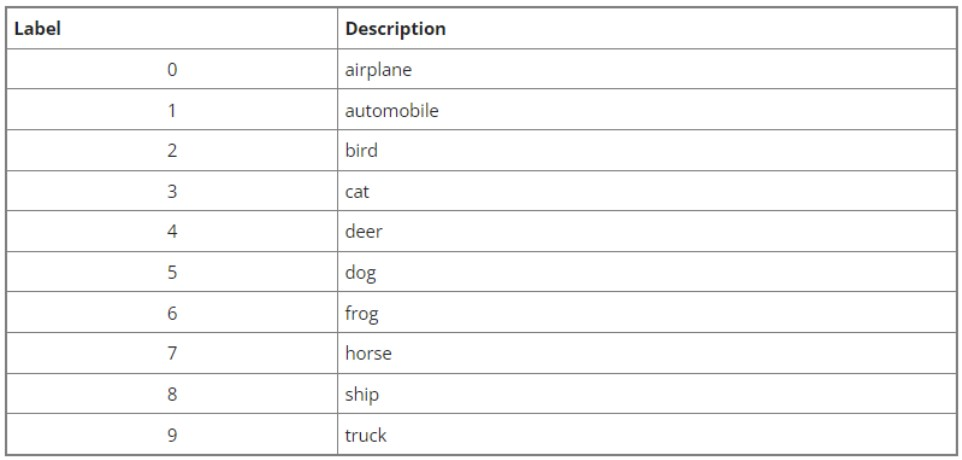
</p>
</div>
<br>
<div dir="auto" >
<p style='text-align: right;'>
اين ديتاست را مي‌توانيد به صورت زير در كراس بخوانيد.

</p>
</div>

`(x_train, y_train), (x_test, y_test) = keras.dataset.cifar10.load_data()`

<br>
<div dir="auto" >
<p style='text-align: right;'>
براي اين ديتاست:<br>
    ابعاد تصاوير و خروجي را نمايش دهيد.<br>
    از كل داده 15 درصد را براي تست و بقيه را براي آموزش و ارزيابي (validation) در نظر بگیرید. دقت کنید این تقسیم‌بندی به صورت default در هنگام خواندن داده رعایت نشده است.<br>
    در فرمت کنونی برای لایه آخر شبکه عصبی از چه Loss ای استفاده می‌کنید؟<br>
    فرمت خروجی را به گونه‌ای تغییر دهید که بتوانیم برای لایه‌ی آخر از CategoricalCrossEntropy به عنوان Loss استفاده کنیم.<br>
    شبکه‌ای با حداکثر پنج لایه مخفی بسازید و خروجی‌های این دیتاست را پیش‌بینی کنید.<br>
    هایپرپارامترهای مدل ساخته شده را بهینه کنید. روش، خروجی و مدت زمان بهینه‌سازی را گزارش کنید. برای این بهینه‌سازی می‌توانید از kerasTuner استفاده کنید.<br>
    معیارهای accuracy, f1-score, roc_auc را برای مدل ساخته شده و روی داده‌های train، validation و test در یک جدول گزارش کنید.<br>
    یک شبکه wide and deep برای این دیتاست طراحی کرده و پیاده‌سازی کنید. نتایج مرحله قبل را برای این شبکه نیز محاسبه کرده و با شبکه deep مقایسه کنید.<br> 
    (امتیازی) یکی از روش‌های بهینه‌سازی پارامترهای الگوریتم یادگیری ماشین، الگوریتم ژنتیک می‌باشد. برای این هدف کتابخانه‌های متعددی در پایتون وجود دارد. یکی از این کتابخانه‌ها که sklearn_genetic (https://pypi.org/project/sklearn-genetic) می‌باشد. این کتابخانه را نصب کرده و برای بهینه‌سازی پارامترهای مدل ساخته شده استفاده کنید. برای اطلاعات بیشتر راجع به پارمترهای این بهینه‌ساز به سایت https://sklearn-genetic.readthedocs.io/en/latest/examples.html رجوع کنید. 
</p>
</div>

For this data: 

1) Show the shape of the images and the output.
2) Consider 15 percent of the total data for testing and the rest for training and evaluation (validation). Please note that this division is not followed by default when reading data.
3) In the current format, what loss do you use for the last layer of the neural network?
4) Change the output format so that we can use CategoricalCrossEntropy as Loss for the last layer.
5) Build a network with up to five hidden layers and predict the outputs of this dataset.
6) Optimize the hyperparameters of the built model. Report the optimization method, output and duration. You can use kerasTuner for this optimization.
7) Report the accuracy, f1-score, roc_auc criteria for the built model and on the train, validation and test data in a table.
8) Design and implement a wide and deep network for this dataset. Calculate the results of the previous step for this network as well and compare it with the deep network.
9) (Extra Score) One of the methods of optimizing machine learning algorithm parameters is genetic algorithm. There are several libraries in Python for this purpose. One of these libraries is sklearn_genetic (https://pypi.org/project/sklearn-genetic). Install this library and use it to optimize the built model parameters. For more information about the parameters of this optimizer, refer to https://sklearn-genetic.readthedocs.io/en/latest/examples.html.

### Q2 Pt. 1:

In [3]:
cifar10_data = keras.datasets.cifar10
(x_train, y_train), (x_test, y_test) = cifar10_data.load_data()

In [5]:
x_train.shape, x_test.shape, y_train.shape, x_test.shape #32*32*3

((50000, 32, 32, 3), (10000, 32, 32, 3), (50000, 1), (10000, 32, 32, 3))

In [7]:
y_train[:10]

array([[6],
       [9],
       [9],
       [4],
       [1],
       [1],
       [2],
       [7],
       [8],
       [3]], dtype=uint8)

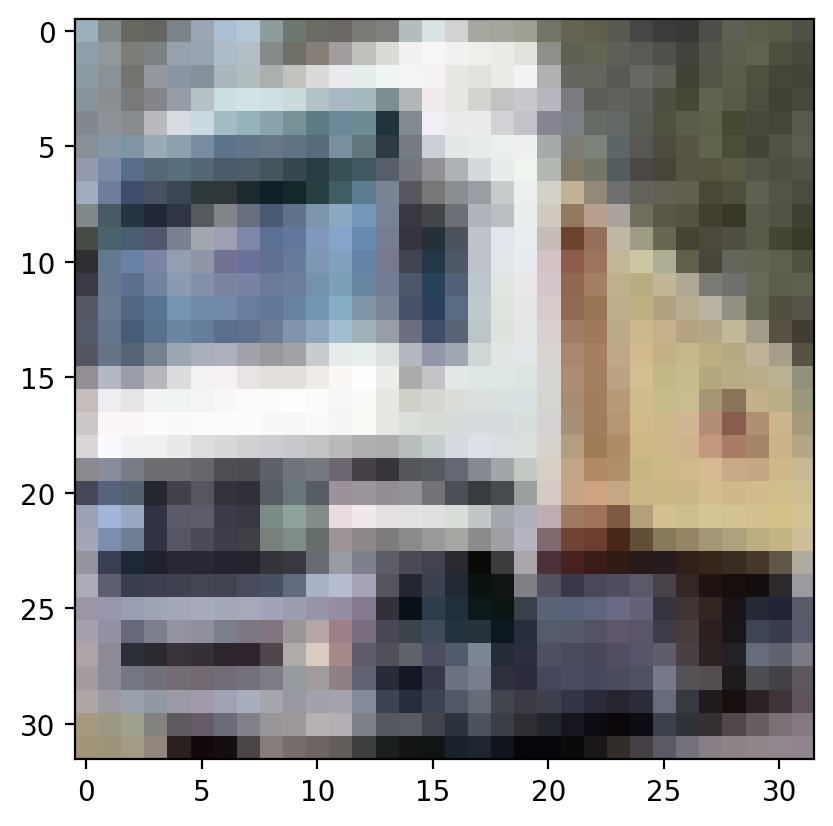

In [9]:
plt.imshow(x_train[1,])

In [11]:
y_train[1] #Checking if it works; that is indeed a picture of a truck!

array([9], dtype=uint8)

In [13]:
#Normalizing the dataset
# print(np.min(x_train), np.max(x_train)) #Output: 0 & 255
x_train, x_test = x_train.astype("float32")/255.0, x_test.astype("float32")/255.0

### Q2 Pt. 2:

In [15]:
#To change the data's train/test to 85/15:
X_tot = np.concatenate((x_train,x_test),axis=0)
Y_tot = np.concatenate((y_train,y_test),axis=0)
X_train_rest, X_test_rest, Y_train_rest, Y_test_rest = train_test_split(X_tot, Y_tot, test_size=0.15)
X_train_rest.shape, X_test_rest.shape, Y_train_rest.shape, Y_test_rest.shape

((51000, 32, 32, 3), (9000, 32, 32, 3), (51000, 1), (9000, 1))

In [16]:
#Now for the validation dataset
X_train, X_validation, Y_train, Y_validation = train_test_split(X_train_rest,Y_train_rest,test_size=0.15)
X_train.shape, X_validation.shape, Y_train.shape, Y_validation.shape

((43350, 32, 32, 3), (7650, 32, 32, 3), (43350, 1), (7650, 1))

### Q2 Pt. 3:

In [ ]:
#For the current model, the loss function can be sparse_categorical_crossentropy; since the output is int.
'''
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])
'''

### Q2 Pt. 4:

In [19]:

'''
***CategoricalCrossentropy:
Computes the crossentropy metric between the labels and predictions.
Use this crossentropy loss function when there are two or more label classes (here, we have 10 label classes). 
We expect labels to be provided in a one_hot representation. 
If you want to provide labels as integers, please use SparseCategoricalCrossentropy loss. 
There should be num_classes floating point values per feature, 
i.e., the shape of both y_pred and y_true are [batch_size, num_classes].
`keras.losses.CategoricalCrossentropy()`
'''
'''
one_hot function:
keras.ops.one_hot(x, num_classes, axis=-1, dtype=None, sparse=False)
Converts integer tensor x into a one-hot tensor.
The one-hot encoding is a representation where each integer value is converted into a binary vector,
with a length equal to num_classes, and the index corresponding to the integer value is marked as 1, 
while all other indices are marked as 0.
'''
#So to transform the output format to one_hot in order to use the categoticalcrossentropy loss:
num_classes = 10

y_train_flat = tf.squeeze(Y_train, axis=1) 
y_val_flat   = tf.squeeze(Y_validation, axis=1)
y_test_flat  = tf.squeeze(Y_test_rest, axis=1)

y_test_onehot = keras.ops.one_hot(y_test_flat, num_classes)
y_train_onehot = keras.ops.one_hot(y_train_flat, num_classes)
y_val_onehot = keras.ops.one_hot(y_val_flat, num_classes)

In [21]:
y_test_onehot.shape , y_train_onehot.shape , y_val_onehot.shape

(TensorShape([9000, 10]), TensorShape([43350, 10]), TensorShape([7650, 10]))

### Q2 Pt. 5:

In [41]:
#To build a model with 5 hidden layers:
#Note: Softmax should only be used in the final layer of a classifier.
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[32, 32, 3]),
    keras.layers.Dense(150, activation="relu"),
    keras.layers.Dense(125, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(75, activation="relu"),
    keras.layers.Dense(50, activation="relu"),
    keras.layers.Dense(10, activation="softmax") #CIFAR10 has 10 classes
])

C:\Users\Asus\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [43]:
model.summary() 

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 3072)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 150)                 │         460,950 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 125)                 │          18,875 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 100)                 │          12,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 75)                  │           7,575 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 50)                  │           3,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 10)                  │             510 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 504,310 (1.92 MB)

 Trainable params: 504,310 (1.92 MB)

 Non-trainable params: 0 (0.00 B)

In [45]:
model.layers

[<Flatten name=flatten, built=True>,
 <Dense name=dense_4, built=True>,
 <Dense name=dense_5, built=True>,
 <Dense name=dense_6, built=True>,
 <Dense name=dense_7, built=True>,
 <Dense name=dense_8, built=True>,
 <Dense name=dense_9, built=True>]

In [47]:
model.compile(loss='categorical_crossentropy',
          optimizer='adam',
          metrics=['accuracy'])

In [49]:
model.fit(X_train, y_train_onehot, epochs=5,
          validation_data=(X_validation, y_val_onehot))

Epoch 1/5
1355/1355 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - accuracy: 0.2952 - loss: 1.9180 - val_accuracy: 0.3563 - val_loss: 1.7751
Epoch 2/5
1355/1355 ━━━━━━━━━━━━━━━━━━━━ 12s 9ms/step - accuracy: 0.3753 - loss: 1.7328 - val_accuracy: 0.3820 - val_loss: 1.7349
Epoch 3/5
1355/1355 ━━━━━━━━━━━━━━━━━━━━ 12s 9ms/step - accuracy: 0.4005 - loss: 1.6638 - val_accuracy: 0.4017 - val_loss: 1.6635
Epoch 4/5
1355/1355 ━━━━━━━━━━━━━━━━━━━━ 12s 9ms/step - accuracy: 0.4198 - loss: 1.6140 - val_accuracy: 0.4204 - val_loss: 1.5995
Epoch 5/5
1355/1355 ━━━━━━━━━━━━━━━━━━━━ 12s 9ms/step - accuracy: 0.4349 - loss: 1.5735 - val_accuracy: 0.4316 - val_loss: 1.6021


In [50]:
loss_eval, metrics_eval = model.evaluate(X_test_rest, y_test_onehot, verbose=0)
print("Loss value: ",loss_eval,"\nMetrics value (CCE): ",metrics_eval)

Loss value:  1.5624854564666748 
Metrics value (CCE):  0.441444456577301


In [51]:
x_test_3 = X_test_rest[0:3]
x_test_3.shape

(3, 32, 32, 3)

In [52]:
pred_3 = model.predict(x_test_3).round(3)
pred_3

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


array([[0.071, 0.054, 0.028, 0.018, 0.055, 0.019, 0.004, 0.265, 0.058,
        0.427],
       [0.018, 0.13 , 0.009, 0.014, 0.01 , 0.015, 0.012, 0.055, 0.016,
        0.72 ],
       [0.017, 0.003, 0.131, 0.107, 0.198, 0.18 , 0.145, 0.211, 0.001,
        0.006]], dtype=float32)

In [53]:
sum(pred_3[0]),sum(pred_3[1]),sum(pred_3[2]) #They're all probabilities!

(0.9989999732933939, 0.9990000231191516, 0.9989999964600429)

In [54]:
np.argmax(model.predict(x_test_3).round(3), axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


array([9, 9, 7], dtype=int64)

In [55]:
Y_test_rest[0:3] #Good enough!

array([[9],
       [9],
       [7]], dtype=uint8)

In [56]:
#To check with one_hot rep
np.argmax(y_test_onehot[:3], axis=1)

array([9, 9, 7], dtype=int64)

### Q2 Pt. 6:

A $\textbf{hyperparameter}$ is a parameter that can be set in order to define any configurable part of a model's learning process. Hyperparameters can be classified as either model hyperparameters (such as the topology and size of a neural network) or algorithm hyperparameters (such as the learning rate and the batch size of an optimizer). These are named hyperparameters in contrast to parameters, which are characteristics that the model learns from the data. 

Model hyperparameters:
- Number of units in each Dense layer 
- Activation functions
- Number of hidden layers

Algorithm hyperparameters:
- Learning rate
- Optimizer (adam, rmsprop, sgd)
- Batch size
- Number of epochs

Regularization hyperparameters:
- Dropout rate
- L2 regularization strength

Some hyperparameters may have no meaningful effect, or one important variable may be conditional upon the value of another. 
Often a separate process of $\textbf{hyperparameter tuning}$ is needed to find a suitable combination for the data and task. <br>
$\textbf{Hyperparameter optimization}$ or tuning is the problem of choosing a set of optimal hyperparameters for a learning algorithm. <br>
Hyperparameter optimization determines the set of hyperparameters that yields an optimal model which minimizes a predefined loss function on a given data set.<br>

Hyperparameter optimization means:
- Trying many combinations of these settings
- Finding the combination that gives the best validation accuracy.

In [179]:
!pip install keras-tuner

In [67]:
'''
 KerasTuner comes with Bayesian Optimization, Hyperband, and Random Search algorithms built-in.
'''
import keras_tuner

In [69]:
def build_model(hp):
    model = keras.Sequential()
    #Input
    model.add(keras.layers.Flatten(input_shape=(32,32,3)))
    #Hidden Layers
    #This time, I gave the choice to tuner.
    for i in range(hp.Int("num_layers", 1, 5)):
        model.add(keras.layers.Dense(
                # Tune number of units separately.
                units=hp.Int(f"units_{i}", min_value=50, max_value=175, step=25),
                activation=hp.Choice("activation", ["relu", "tanh"]),))
    #Output
    model.add(keras.layers.Dense(10, activation="softmax"))
    #Compile with a LR
    learning_rate = hp.Float("lr", min_value=1e-4, max_value=1e-2, sampling="log")
    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate=learning_rate),
        loss="categorical_crossentropy",
        metrics=["accuracy"],)

    return model

In [71]:
build_model(keras_tuner.HyperParameters())

<Sequential name=sequential_1, built=True>

In [73]:
tuner = keras_tuner.RandomSearch(
    hypermodel=build_model,
    objective="val_accuracy",
    max_trials=3,
    overwrite=True,
    project_name="CIFAR10_tuner"
    # executions_per_trial=3
)

In [75]:
tuner.search_space_summary()

Search space summary
Default search space size: 4
num_layers (Int)
{'default': None, 'conditions': [], 'min_value': 1, 'max_value': 5, 'step': 1, 'sampling': 'linear'}
units_0 (Int)
{'default': None, 'conditions': [], 'min_value': 50, 'max_value': 175, 'step': 25, 'sampling': 'linear'}
activation (Choice)
{'default': 'relu', 'conditions': [], 'values': ['relu', 'tanh'], 'ordered': False}
lr (Float)
{'default': 0.0001, 'conditions': [], 'min_value': 0.0001, 'max_value': 0.01, 'step': None, 'sampling': 'log'}


In [77]:
tuner.search(X_train, y_train_onehot, epochs=2, validation_data=(X_validation, y_val_onehot))

Trial 3 Complete [00h 00m 18s]
val_accuracy: 0.39725491404533386

Best val_accuracy So Far: 0.39725491404533386
Total elapsed time: 00h 01m 03s


In [79]:
models = tuner.get_best_models(num_models=2)
best_model = models[0]
best_model.summary()

C:\Users\Asus\anaconda3\Lib\site-packages\keras\src\saving\saving_lib.py:797: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 26 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))
C:\Users\Asus\anaconda3\Lib\site-packages\keras\src\saving\saving_lib.py:797: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 3072)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 75)                  │         230,475 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 75)                  │           5,700 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 175)                 │          13,300 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 175)                 │          30,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 175)                 │          30,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │           1,760 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 312,835 (1.19 MB)

 Trainable params: 312,835 (1.19 MB)

 Non-trainable params: 0 (0.00 B)

In [81]:
tuner.results_summary()

Results summary
Results in .\CIFAR10_tuner
Showing 10 best trials
Objective(name="val_accuracy", direction="max")

Trial 2 summary
Hyperparameters:
num_layers: 5
units_0: 75
activation: relu
lr: 0.0007101901157481048
units_1: 75
units_2: 175
units_3: 175
units_4: 175
Score: 0.39725491404533386

Trial 0 summary
Hyperparameters:
num_layers: 3
units_0: 175
activation: relu
lr: 0.006364617251886751
units_1: 50
units_2: 50
Score: 0.3373856246471405

Trial 1 summary
Hyperparameters:
num_layers: 5
units_0: 50
activation: relu
lr: 0.008518762868859345
units_1: 50
units_2: 75
units_3: 50
units_4: 50
Score: 0.1684967279434204


-----

### Q2 Pt. 7:

In [83]:
#Roc_auc
from sklearn.metrics import roc_auc_score

pred_test_cf10 = model.predict(X_test_rest)
pred_train_cf10 = model.predict(X_train)
pred_val_cf10 = model.predict(X_validation)

roc_auc_test = roc_auc_score(y_test_onehot,pred_test_cf10, multi_class='ovr')
roc_auc_train = roc_auc_score(y_train_onehot,pred_train_cf10, multi_class='ovr')
roc_auc_val = roc_auc_score(y_val_onehot,pred_val_cf10, multi_class='ovr')

roc_auc_test, roc_auc_train, roc_auc_val

282/282 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
1355/1355 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step
240/240 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


(0.8547175890888636, 0.8612282908716107, 0.8470029340698881)

In [85]:
#Accuracy_score
from sklearn.metrics import accuracy_score

pred_class_test_cf10 = np.argmax(model.predict(X_test_rest), axis=1)
pred_class_train_cf10 = np.argmax(model.predict(X_train), axis=1)
pred_class_val_cf10 = np.argmax(model.predict(X_validation), axis=1)

accuracy_test = accuracy_score(Y_test_rest,pred_class_test_cf10)
accuracy_train = accuracy_score(Y_train,pred_class_train_cf10)
accuracy_val = accuracy_score(Y_validation,pred_class_val_cf10)

accuracy_test, accuracy_train, accuracy_val

282/282 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
1355/1355 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step
240/240 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


(0.4414444444444444, 0.45575547866205307, 0.43163398692810456)

In [87]:
#F1_score
from sklearn.metrics import f1_score

f1_test = f1_score(Y_test_rest,pred_class_test_cf10,average='weighted')
f1_train = f1_score(Y_train,pred_class_train_cf10,average='weighted')
f1_val = f1_score(Y_validation,pred_class_val_cf10,average='weighted')

f1_test, f1_train, f1_val

(0.4348430841557669, 0.4484828156657885, 0.4251214607281385)

In [89]:
df = pd.DataFrame({
    'accuracy': [accuracy_train, accuracy_val, accuracy_test],
    'f1_weighted': [f1_train, f1_val, f1_test],
    'roc_auc': [roc_auc_train, roc_auc_val, roc_auc_test]},
    index=['train','validation','test'])
df

,accuracy,f1_weighted,roc_auc
train,0.455755,0.448483,0.861228
validation,0.431634,0.425121,0.847003
test,0.441444,0.434843,0.854718


### Q2 Pt. 8:

In [91]:
class WideAndDeepANN(keras.Model):
    def __init__(self, activation="relu", **kwargs): 
        #kwargs : key-word-arguement. 
        #**kwargs in a function: it means we can give it however many kwargs as we want.
        super().__init__(**kwargs) 
        #Input is the kwargs. 
        self.flatten_input = keras.layers.Flatten(input_shape=[32, 32, 3])
        self.hidden_layer_1 = keras.layers.Dense(150, activation=activation)
        self.hidden_layer_2 = keras.layers.Dense(125, activation=activation)
        self.hidden_layer_3 = keras.layers.Dense(100, activation=activation)
        self.hidden_layer_4 = keras.layers.Dense(75, activation=activation)
        self.hidden_layer_5 = keras.layers.Dense(50, activation=activation)
        #Output
        self.final_output   = keras.layers.Dense(10, activation="softmax")

    def call(self, inputs):
        # input_1 = inputs
        flat_input = self.flatten_input(inputs)
        h1_out = self.hidden_layer_1(flat_input)
        h2_out = self.hidden_layer_2(h1_out)
        h3_out = self.hidden_layer_3(h2_out)
        h4_out = self.hidden_layer_4(h3_out)
        h5_out = self.hidden_layer_5(h4_out)
        concat_out = keras.layers.concatenate([flat_input, h5_out]) #This is a connection layer, so it will be in the class function.
        final_out = self.final_output(concat_out)
        return final_out

In [93]:
model_wad = WideAndDeepANN()

C:\Users\Asus\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [95]:
model_wad.compile(loss=["categorical_crossentropy"],
              # loss_weights = [0.8, 0.2],
              optimizer="adam",
              metrics=["accuracy"])

In [97]:
model_wad.fit(X_train, y_train_onehot, epochs=5,
          validation_data=(X_validation, y_val_onehot))

Epoch 1/5
1355/1355 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - accuracy: 0.3113 - loss: 1.9709 - val_accuracy: 0.3455 - val_loss: 1.9825
Epoch 2/5
1355/1355 ━━━━━━━━━━━━━━━━━━━━ 13s 10ms/step - accuracy: 0.3507 - loss: 1.8780 - val_accuracy: 0.3740 - val_loss: 1.8236
Epoch 3/5
1355/1355 ━━━━━━━━━━━━━━━━━━━━ 13s 9ms/step - accuracy: 0.3650 - loss: 1.8439 - val_accuracy: 0.3490 - val_loss: 1.8671
Epoch 4/5
1355/1355 ━━━━━━━━━━━━━━━━━━━━ 12s 9ms/step - accuracy: 0.3746 - loss: 1.8282 - val_accuracy: 0.3558 - val_loss: 1.8742
Epoch 5/5
1355/1355 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.3774 - loss: 1.8133 - val_accuracy: 0.3421 - val_loss: 1.9085


In [98]:
model_wad.summary()

Model: "wide_and_deep_ann"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)                  │ (None, 3072)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 150)                 │         460,950 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 125)                 │          18,875 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 100)                 │          12,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 75)                  │           7,575 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 50)                  │           3,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 10)                  │          31,230 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,605,092 (6.12 MB)

 Trainable params: 535,030 (2.04 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,070,062 (4.08 MB)

In [99]:
loss_eval_wad, metrics_eval_wad = model_wad.evaluate(X_test_rest, y_test_onehot, verbose=0)
print("Loss value WAD: ",loss_eval_wad,"\nMetrics value WAD (CCE): ",metrics_eval_wad)

Loss value WAD:  1.881729006767273 
Metrics value WAD (CCE):  0.3495555520057678


In [100]:
x_test_10 = X_test_rest[0:10]
pred_10 = model_wad.predict(x_test_10).round(3)
pred_10_idx = np.argmax(model_wad.predict(x_test_10).round(3), axis=1)
pred_10_idx,Y_test_rest[0:10] #Better result than before!

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


(array([9, 9, 7, 2, 6, 5, 5, 0, 0, 5], dtype=int64),
 array([[9],
        [9],
        [7],
        [5],
        [6],
        [4],
        [5],
        [1],
        [0],
        [6]], dtype=uint8))

### Q7 Pt. 9: Bonus Question:

In [115]:
!pip install sklearn_genetic

In [119]:
!pip install sklearn-genetic-opt

In [196]:
#using the build_model function similar to what we defined back in Pt. 7, but without "Hp":
#I am going to run a limited version of the previous model.
def build_model_skg(n_layers, units, activation, lr):
    model = keras.Sequential()
    model.add(keras.layers.Flatten(input_shape=(32,32,3)))
    for i in range(n_layers):
        model.add(keras.layers.Dense(units=units, activation=activation))
    model.add(keras.layers.Dense(10, activation='softmax'))
    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate=lr),
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )
    return model

In [200]:
from scikeras.wrappers import KerasClassifier
'''
The KerasClassifier class is a special wrapper class that combines the Scikit-learn classifier API with Keras parametric models.
Bascially, it wraps your model and makes it behave like a Scikit-learn estimator, and further, so GeneticSelectionCV can perform CV on it.
    Arguements:
    1) model: Union[None, Callable[…, keras.Model], keras.Model], default None
    Used to build the Keras Model. When called, must return a compiled instance of a Keras Model to be used by fit, predict, etc. 
    If None, you must implement _keras_build_fn.

    2) batch_size: Union[int, None], default None
    Number of samples per gradient update. This will be applied to both fit and predict. 
    To specify different numbers, pass fit__batch_size=32 and predict__batch_size=1000 (for example). 
    To auto-adjust the batch size to use all samples, pass batch_size=-1.

'''
skg_model = KerasClassifier(model=build_model_skg)
                            #epochs=3,batch_size=64,verbose=0)

In [202]:
skg_model.get_params()

{'model': <function __main__.build_model_skg(n_layers, units, activation, lr)>,
 'build_fn': None,
 'warm_start': False,
 'random_state': None,
 'optimizer': 'rmsprop',
 'loss': None,
 'metrics': None,
 'batch_size': None,
 'validation_batch_size': None,
 'verbose': 1,
 'callbacks': None,
 'validation_split': 0.0,
 'shuffle': True,
 'run_eagerly': False,
 'epochs': 1,
 'class_weight': None}

In [204]:
from sklearn_genetic import space
param_grid = {
    "model__n_layers": space.Integer(1, 5),
    "model__units": space.Integer(50, 150),
    "model__activation": space.Categorical(["relu", "tanh"]),
    "model__lr": space.Continuous(1e-4, 1e-2)
}

In [206]:
# from genetic_selection import GeneticSelectionCV
from sklearn_genetic import GASearchCV
evolved_estimator = GASearchCV(estimator=skg_model,
                               n_jobs=1, #parallel processing: sequentially
                               population_size=4, #number of candidate solutions per generation in the algorithm
                               generations=4, #number of evolution steps the algorithm will take
                               cv=2, #cross validation folds for evaluating each hyperparameter set -> this sets my trains to 2 folds.
                               verbose = True, 
                               scoring='accuracy', #the metric
                               param_grid=param_grid)
y_train_labels = np.argmax(y_train_onehot, axis=1)
evolved_estimator.fit(X_train, y_train_labels)

C:\Users\Asus\anaconda3\Lib\site-packages\deap\creator.py:185: RuntimeWarning: A class named 'FitnessMax' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
C:\Users\Asus\anaconda3\Lib\site-packages\deap\creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
C:\Users\Asus\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


678/678 ━━━━━━━━━━━━━━━━━━━━ 30s 11ms/step - accuracy: 0.1997 - loss: 2.1290
678/678 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step
678/678 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


C:\Users\Asus\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


678/678 ━━━━━━━━━━━━━━━━━━━━ 63s 5ms/step - accuracy: 0.1730 - loss: 2.1522
678/678 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
678/678 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


C:\Users\Asus\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


678/678 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.1433 - loss: 2.2757
678/678 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
678/678 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


C:\Users\Asus\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


678/678 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.1562 - loss: 2.2054
678/678 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
678/678 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


C:\Users\Asus\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


678/678 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.2324 - loss: 2.0620
678/678 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
678/678 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


C:\Users\Asus\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


678/678 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.2200 - loss: 2.0795
678/678 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
678/678 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


C:\Users\Asus\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


678/678 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.0957 - loss: 2.3973
678/678 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
678/678 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


C:\Users\Asus\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


678/678 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.1024 - loss: 2.3915
678/678 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
678/678 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
gen	nevals	fitness 	fitness_std	fitness_max	fitness_min
0  	4     	0.180715	0.0513198  	0.240092   	0.0998385  


C:\Users\Asus\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


678/678 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.1008 - loss: 2.3739
678/678 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
678/678 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


C:\Users\Asus\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


678/678 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.1244 - loss: 2.3407
678/678 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
678/678 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


C:\Users\Asus\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


678/678 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.0981 - loss: 2.4232
678/678 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
678/678 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


C:\Users\Asus\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


678/678 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.0997 - loss: 2.4209
678/678 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
678/678 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


C:\Users\Asus\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


678/678 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - accuracy: 0.2832 - loss: 1.9634
678/678 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
678/678 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


C:\Users\Asus\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


678/678 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - accuracy: 0.2769 - loss: 1.9587
678/678 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
678/678 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


C:\Users\Asus\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


678/678 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.2163 - loss: 2.0852
678/678 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
678/678 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


C:\Users\Asus\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


678/678 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.2314 - loss: 2.0501
678/678 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
678/678 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


C:\Users\Asus\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


678/678 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.0980 - loss: 2.4497
678/678 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
678/678 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


C:\Users\Asus\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


678/678 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.1352 - loss: 2.3622
678/678 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
678/678 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


C:\Users\Asus\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


678/678 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.2308 - loss: 2.1408
678/678 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
678/678 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


C:\Users\Asus\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


678/678 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.2222 - loss: 2.1732
678/678 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
678/678 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


C:\Users\Asus\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


678/678 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.1596 - loss: 2.2604
678/678 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
678/678 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


C:\Users\Asus\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


678/678 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.1665 - loss: 2.2091
678/678 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
678/678 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
1  	8     	0.276932	0.0572849  	0.332641   	0.202353   


C:\Users\Asus\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


678/678 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.2511 - loss: 2.0362
678/678 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
678/678 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


C:\Users\Asus\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


678/678 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.2543 - loss: 2.0274
678/678 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
678/678 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


C:\Users\Asus\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


678/678 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.0990 - loss: 2.3733
678/678 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
678/678 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


C:\Users\Asus\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


678/678 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.1098 - loss: 2.3550
678/678 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
678/678 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


C:\Users\Asus\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


678/678 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - accuracy: 0.2525 - loss: 2.0102
678/678 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
678/678 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


C:\Users\Asus\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


678/678 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.2494 - loss: 2.0007
678/678 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
678/678 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


C:\Users\Asus\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


678/678 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.2113 - loss: 2.1481
678/678 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
678/678 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


C:\Users\Asus\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


678/678 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.1791 - loss: 2.1708
678/678 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
678/678 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


C:\Users\Asus\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


678/678 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.0988 - loss: 2.4382
678/678 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
678/678 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


C:\Users\Asus\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


678/678 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.1010 - loss: 2.4498
678/678 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
678/678 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
2  	8     	0.332641	0          	0.332641   	0.332641   


C:\Users\Asus\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


678/678 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.2191 - loss: 2.0692
678/678 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
678/678 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


C:\Users\Asus\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


678/678 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - accuracy: 0.1888 - loss: 2.0993
678/678 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
678/678 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


C:\Users\Asus\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


678/678 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.2855 - loss: 1.9605
678/678 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
678/678 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


C:\Users\Asus\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


678/678 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.2924 - loss: 1.9435
678/678 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
678/678 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


C:\Users\Asus\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


678/678 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.1696 - loss: 2.1208
678/678 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
678/678 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


C:\Users\Asus\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


678/678 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - accuracy: 0.2038 - loss: 2.0796
678/678 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
678/678 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


C:\Users\Asus\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


678/678 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.2628 - loss: 1.9827
678/678 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
678/678 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


C:\Users\Asus\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


678/678 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.2794 - loss: 1.9619
678/678 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
678/678 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


C:\Users\Asus\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


678/678 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - accuracy: 0.1816 - loss: 2.1550
678/678 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
678/678 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


C:\Users\Asus\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


678/678 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.1728 - loss: 2.1512
678/678 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
678/678 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


C:\Users\Asus\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


678/678 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.1947 - loss: 2.1295
678/678 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
678/678 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


C:\Users\Asus\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


678/678 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.1696 - loss: 2.1598
678/678 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
678/678 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
3  	8     	0.340063	0.00428518 	0.342537   	0.332641   


C:\Users\Asus\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


678/678 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.2346 - loss: 2.0884
678/678 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
678/678 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


C:\Users\Asus\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


678/678 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.2493 - loss: 2.0600
678/678 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
678/678 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


C:\Users\Asus\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


678/678 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.2274 - loss: 2.0770
678/678 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
678/678 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


C:\Users\Asus\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


678/678 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.2532 - loss: 2.0144
678/678 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
678/678 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


C:\Users\Asus\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


678/678 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.2908 - loss: 1.9445
678/678 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
678/678 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


C:\Users\Asus\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


678/678 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.2895 - loss: 1.9488
678/678 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
678/678 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


C:\Users\Asus\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


678/678 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.2753 - loss: 1.9607
678/678 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
678/678 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


C:\Users\Asus\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


678/678 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.2830 - loss: 1.9515
678/678 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
678/678 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


C:\Users\Asus\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


678/678 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.2103 - loss: 2.2003
678/678 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
678/678 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


C:\Users\Asus\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


678/678 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.1668 - loss: 2.2478
678/678 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
678/678 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
4  	8     	0.342537	0          	0.342537   	0.342537   


C:\Users\Asus\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1355/1355 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.3225 - loss: 1.8644


GASearchCV(cv=2,
           estimator=KerasClassifier(model=<function build_model_skg at 0x000001FE001F9F80>, model__activation='relu', model__lr=0.000829608111171121, model__n_layers=3, model__units=147),
           generations=4,
           param_grid={'model__activation': <sklearn_genetic.space.space.Categorical object at 0x000001FDF2D25F10>,
                       'model__lr': <sklearn_genetic.space.space.Continuous object at 0x000001FDF3F6AC90>,
                       'model__n_layers': <sklearn_genetic.space.space.Integer object at 0x000001FDF3F6ACC0>,
                       'model__units': <sklearn_genetic.space.space.Integer object at 0x000001FDF402B3B0>},
           population_size=4, return_train_score=True, scoring='accuracy',
           warm_start_configs=[])

In [264]:
y_test_labels = np.argmax(y_test_onehot, axis=1)
best_params = evolved_estimator.best_params_
accuracy = evolved_estimator.best_score_
best_model = evolved_estimator.best_estimator_
y_pred_skg = best_model.predict(X_test_rest[0:10])

print("Best parameters: ",best_params,"\nAccuracy: ",accuracy, 
      "\nBest Model: ",best_model,"\n Pred: ", y_pred_skg, "\n True: ",y_test_labels[0:10])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
Best parameters:  {'model__n_layers': 3, 'model__units': 147, 'model__activation': 'relu', 'model__lr': 0.000829608111171121} 
Accuracy:  0.34253748558246827 
Best Model:  KerasClassifier(
	model=<function build_model_skg at 0x000001FE001F9F80>
	build_fn=None
	warm_start=False
	random_state=None
	optimizer=rmsprop
	loss=None
	metrics=None
	batch_size=None
	validation_batch_size=None
	verbose=1
	callbacks=None
	validation_split=0.0
	shuffle=True
	run_eagerly=False
	epochs=1
	class_weight=None
	model__n_layers=3
	model__units=147
	model__activation=relu
	model__lr=0.000829608111171121
) 
 Pred:  [2 0 9 6 2 9 3 1 4 1] 
 True:  [4 0 6 6 4 1 7 1 3 1]


In [270]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test_labels, best_model.predict(X_test_rest))

282/282 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step


0.38922222222222225

-----------